In [2]:
import pandas as pd
import os
import chardet
import unicodedata

from sklearn.neighbors import NearestCentroid

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_folder = "../storage/raw"
data_file = "may_meteo21.csv"
general_weather_file = "Estaciones_control_datos_meteorologicos.csv"
general_bike_stations_file = "bases_bicimad.csv"

In [4]:
def basic_df_load_and_clean(data_folder, data_file_name):
    #this 2 lines allow to retrieve the encoding so that we can open the file
    with open(os.path.join(data_folder, data_file_name), 'rb') as f:
        result = chardet.detect(f.read())

    df = pd.read_csv(os.path.join(data_folder, data_file_name), sep=";",encoding=result['encoding'])

    # define a helper function to remove accents from text
    def remove_accents(text):
        return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

    #setting all column names into lowercase without accents
    # get the current column names
    old_column_names = df.columns.tolist()

    # remove accents and set to lowercase for each column name
    new_column_names = [remove_accents(name).lower() for name in old_column_names]

    # use the new column names to rename the columns
    df = df.rename(columns=dict(zip(old_column_names, new_column_names)))

    df = df.dropna(how="all")

    return df

# Finding merging mechanism

## Loading data

In [5]:
ws_df = basic_df_load_and_clean(data_folder, general_weather_file)
bs_df = basic_df_load_and_clean(data_folder, general_bike_stations_file)
weather_df = pd.read_csv(os.path.join(data_folder, data_file), sep=";")

In [6]:
ws_df.head()

,codigo,codigo_corto,estacion,direccion,longitud_etrs89,latitud_etrs89,altitud,vv (81),dv (82),t (83),...,cod_via,via_clase,via_par,via_nombre,num_via,coordenada_x_etrs89,coordenada_y_etrs89,longitud,latitud,unnamed: 23
0,28079004.0,4.0,Plaza España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637.0,NaN,NaN,X,...,273600.0,PLAZA,DE,ESPAÑA,NaN,"439579,3291","4475049,263",-3.712257,40.423882,NaN
1,28079008.0,8.0,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672.0,NaN,NaN,X,...,18900.0,CALLE,DE,ALCALA,NaN,"442117,2366","4474770,696",-3.682316,40.421553,NaN
2,28079016.0,16.0,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695.0,NaN,NaN,X,...,798700.0,CALLE,DEL,VIZCONDE DE LOS ASILOS,NaN,"445786,1729","4476796,019",-3.639242,40.440046,NaN
3,28079018.0,18.0,Farolillo,Calle Farolillo - C/Ervigio,"3°43'54.61""O","40°23'41.22""N",632.0,NaN,NaN,X,...,1903.0,CALLE,DEL,FAROLILLO,NaN,"437891,6961","4471832,769",-3.731836,40.394782,NaN
4,28079024.0,24.0,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,X,X,X,...,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-3.747345,40.419358,NaN


In [7]:
ws_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   codigo               26 non-null     float64
 1   codigo_corto         26 non-null     float64
 2   estacion             26 non-null     object 
 3   direccion            26 non-null     object 
 4   longitud_etrs89      26 non-null     object 
 5   latitud_etrs89       26 non-null     object 
 6   altitud              26 non-null     float64
 7   vv (81)              10 non-null     object 
 8   dv (82)              10 non-null     object 
 9   t (83)               25 non-null     object 
 10  hr (86)              23 non-null     object 
 11  pb (87)              8 non-null      object 
 12  rs (88)              8 non-null      object 
 13  p (89)               10 non-null     object 
 14  cod_via              25 non-null     float64
 15  via_clase            26 non-null     objec

The nulls in each magnitude mark the stations that **do not** register that magnitude

In [8]:
bs_df.head()

,numero,gis_x,gis_y,fecha de alta,distrito,barrio,calle,nº finca,tipo de reserva,numero de plazas,longitud,latitud,direccion
0,001 a,"440443,61","4474290,65",43803,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.417111,"ALCALA, CALLE, DE, 2"
1,001 b,"440480,56","4474301,74",43867,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-3.701564,40.417213,"ALCALA, CALLE, DE, 6"
2,2,"440134,83","4474678,23",41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE, 1"
3,3,"440012,98","4475760,68",41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL, 2"
4,4,"440396,4","4475565,36",41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,-3.702674,40.428590,"MANUELA MALASAÑA, CALLE, DE, 3"


In [9]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   numero            269 non-null    object 
 1   gis_x             269 non-null    object 
 2   gis_y             269 non-null    object 
 3   fecha de alta     269 non-null    int64  
 4   distrito          269 non-null    object 
 5   barrio            269 non-null    object 
 6   calle             269 non-null    object 
 7   nº finca          269 non-null    object 
 8   tipo de reserva   269 non-null    object 
 9   numero de plazas  269 non-null    int64  
 10  longitud          269 non-null    float64
 11  latitud           269 non-null    float64
 12  direccion         269 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 27.4+ KB


## Fixing problems in the general list of weather stations

### Some stations, for some magnitudes, did not have the whole month of data

This is a problem, because as we are dealing with time series, we need the data to be continuous. We cannot miss a day. From the analysis we have seen that it is a whole station which presents this problem. It makes sense, as it would be very strange for a station to register some magnitudes and not others in one period of time. To solve for this, we will delete the registers of the stations that don't account for the maximum number of days registering data on that month. We need to set it like that because each month has 30, 31 or 27 days. Then, as we have a lot of weather stations, we will assign the bike stations close to the deleted weather station to another weather station

Thankfully this problem cannot happen in the hours time range, as a day data point contains the 24 hours.

In [10]:
counting_analysis = weather_df[["ESTACION", "MAGNITUD", "DIA"]].groupby(["ESTACION", "MAGNITUD"]).count().reset_index()
counting_analysis

,ESTACION,MAGNITUD,DIA
0,4,83,31
1,8,83,31
2,8,86,31
3,16,86,31
4,18,83,31
...,...,...,...
85,112,86,31
86,113,83,31
87,113,86,31
88,115,83,31


In [11]:
counting_analysis["DIA"].unique()

array([31, 30])

In [12]:
counting_analysis[counting_analysis["DIA"] == 30]

,ESTACION,MAGNITUD,DIA
71,108,81,30
72,108,82,30
73,108,83,30
74,108,86,30
75,108,87,30
76,108,88,30
77,108,89,30


In [13]:
days_of_month = counting_analysis["DIA"].unique().max()
days_of_month

31

In [14]:
stations_to_delete = counting_analysis.loc[counting_analysis["DIA"]<days_of_month, "ESTACION"].unique()
stations_to_delete

array([108])

In [15]:
weather_df_filtered = weather_df[~weather_df["ESTACION"].isin(stations_to_delete)]

In [16]:
# checking that station 108 is not there
weather_df_filtered["ESTACION"].unique()

array([102, 103, 104, 106, 107, 109, 110, 111, 112, 113, 115,   4,   8,
        16,  18,  24,  35,  36,  38,  39,  54,  56,  58,  59])

### Incoherences between weather stations register and weather stations gathering data

There is a small problem. For example for march 2021 (currently being analyzed), there are stations that are registered in ws_df BUT are not gathering data, so they don't appear in weather_df (historical data). I imagine this is caused due to errors or maintenance. We will assume this is caused for reasons such as maintenance, and that there is a possibility of some stations not existing in the historical dataframe in different moments of time, and that the ws_df contains ALL weather stations. This will force us to first filter the weather stations through the stations gathering data in the weather historical data.

In [17]:
ws_df["codigo_corto"].sort_values().unique()

array([  4.,   8.,  16.,  18.,  24.,  35.,  36.,  38.,  39.,  54.,  56.,
        58.,  59., 102., 103., 104., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115.])

In [18]:
weather_df["ESTACION"].sort_values().unique()

array([  4,   8,  16,  18,  24,  35,  36,  38,  39,  54,  56,  58,  59,
       102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 115])

In [19]:
# we ensure we are only working with the stations that are gathering data at any time
ws_df_filtered = ws_df[ws_df["codigo_corto"].isin(weather_df_filtered["ESTACION"].unique())]

Weather station 114 exists in the general table but is not gathering data at least for this month

### The weather stations file IS NOT CORRECT FOR THE MAGNITUDES EACH STATION MEASURES

For example, for station 16 the csv states that it is measuring magnitudes 83 and 86, but then only magnitude 86 is registered for march of 2021. Again, we don't know the reason for this misconfiguration, so we will make the code robust adjusting the magnitudes stated in the ws_df to those seen in the historical dataframe.

In [20]:
"""
81 - VELOCIDAD VIENTO
82 - DIR. DE VIENTO
83 - TEMPERATURA
86 - HUMEDAD RELATIVA
87 - PRESION BARIOMETRICA
88 - RADIACION SOLAR
89 - PRECIPITACIÓN"""
#we rename the columns
MAGNITUDES = ["vv (81)", "dv (82)", "t (83)", "hr (86)", "pb (87)", "rs (88)", "p (89)"]
ws_df_filtered = ws_df_filtered.rename(dict(zip(MAGNITUDES, [81, 82, 83, 86, 87, 88, 89])), axis=1)
ws_df_filtered["codigo_corto"] = ws_df_filtered["codigo_corto"].astype(int)
MAGNITUDES = [81, 82, 83, 86, 87, 88, 89]

In [21]:
# magnitudes values for station 16
ws_df_filtered.loc[ws_df_filtered["codigo_corto"]==16, MAGNITUDES]

,81,82,83,86,87,88,89
2,NaN,NaN,X,X,NaN,NaN,NaN


In [22]:
for magnitud in MAGNITUDES:
    stations_per_magnitude = weather_df_filtered.loc[weather_df_filtered["MAGNITUD"] == magnitud, "ESTACION"].unique()
    ws_df_filtered.loc[~ws_df_filtered["codigo_corto"].isin(stations_per_magnitude), magnitud] = None

In [23]:
ws_df_filtered.head()

,codigo,codigo_corto,estacion,direccion,longitud_etrs89,latitud_etrs89,altitud,81,82,83,...,cod_via,via_clase,via_par,via_nombre,num_via,coordenada_x_etrs89,coordenada_y_etrs89,longitud,latitud,unnamed: 23
0,28079004.0,4,Plaza España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637.0,None,None,X,...,273600.0,PLAZA,DE,ESPAÑA,NaN,"439579,3291","4475049,263",-3.712257,40.423882,NaN
1,28079008.0,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672.0,None,None,X,...,18900.0,CALLE,DE,ALCALA,NaN,"442117,2366","4474770,696",-3.682316,40.421553,NaN
2,28079016.0,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695.0,None,None,None,...,798700.0,CALLE,DEL,VIZCONDE DE LOS ASILOS,NaN,"445786,1729","4476796,019",-3.639242,40.440046,NaN
3,28079018.0,18,Farolillo,Calle Farolillo - C/Ervigio,"3°43'54.61""O","40°23'41.22""N",632.0,None,None,X,...,1903.0,CALLE,DEL,FAROLILLO,NaN,"437891,6961","4471832,769",-3.731836,40.394782,NaN
4,28079024.0,24,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,X,X,X,...,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-3.747345,40.419358,NaN


In [24]:
# magnitudes values for station 16
ws_df_filtered.loc[ws_df_filtered["codigo_corto"]==16, MAGNITUDES]

,81,82,83,86,87,88,89
2,None,None,None,X,None,None,None


## WARNING:

having done all these adjustments and assuming that there can be variations between months in magnitudes registered or working stations, this code must be executed month by month (if we assume everything is constant and nice during the whole month). Maybe it can be executed for a whole dataframe with all the months, but I am not sure.

## Merging mechanism

To merge bike stations and weather stations we are going to use the location. We are going to assign the closest weather station to each bike station, so that weather data is as accurate as possible. We are going to use NearestCentroid, which bassically assigns the closest class to each data point. As this classification is a spatial classification taking into account longitude and latitude, it will be more than enough

IMPORTANT! I have seen that not all stations measure all magnitudes. So the ideal case scenario is to build a merging mechanism for each magnitude, so that each bike station looks for the data of each magnitude in the nearest weather station that measures that magnitude.

### Merging mechanism per each magnitude

In [25]:
"""
81 - VELOCIDAD VIENTO
82 - DIR. DE VIENTO
83 - TEMPERATURA
86 - HUMEDAD RELATIVA
87 - PRESION BARIOMETRICA
88 - RADIACION SOLAR
89 - PRECIPITACIÓN"""

ws_df_filtered.head()

,codigo,codigo_corto,estacion,direccion,longitud_etrs89,latitud_etrs89,altitud,81,82,83,...,cod_via,via_clase,via_par,via_nombre,num_via,coordenada_x_etrs89,coordenada_y_etrs89,longitud,latitud,unnamed: 23
0,28079004.0,4,Plaza España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637.0,None,None,X,...,273600.0,PLAZA,DE,ESPAÑA,NaN,"439579,3291","4475049,263",-3.712257,40.423882,NaN
1,28079008.0,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672.0,None,None,X,...,18900.0,CALLE,DE,ALCALA,NaN,"442117,2366","4474770,696",-3.682316,40.421553,NaN
2,28079016.0,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695.0,None,None,None,...,798700.0,CALLE,DEL,VIZCONDE DE LOS ASILOS,NaN,"445786,1729","4476796,019",-3.639242,40.440046,NaN
3,28079018.0,18,Farolillo,Calle Farolillo - C/Ervigio,"3°43'54.61""O","40°23'41.22""N",632.0,None,None,X,...,1903.0,CALLE,DEL,FAROLILLO,NaN,"437891,6961","4471832,769",-3.731836,40.394782,NaN
4,28079024.0,24,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,X,X,X,...,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-3.747345,40.419358,NaN


### Assigning weather station to bike stations for each magnitude

In [26]:
# adding for each magnitude the nearest weather station to each bike station
coord_bs = bs_df[["latitud", "longitud"]]

classifier = NearestCentroid()

for magnitude in MAGNITUDES:
    #we select the rows of the stations that measure each magnitude
    ws_df_magnitude = ws_df_filtered[~ws_df_filtered[magnitude].isna()]
    #we get the coordinates of the stations that measure that specific magnitude
    coord_ws_magnitude = ws_df_magnitude[["latitud","longitud"]]
    stations_magnitude = ws_df_magnitude["codigo_corto"]
    # we fit the model with the stations of this magnitude
    classifier.fit(coord_ws_magnitude, stations_magnitude)
    # we assign a weather station to each bike station per each magnitude
    ws_for_bs_magnitude = classifier.predict(coord_bs)

    bs_df["weather_station_" + str(magnitude)] = ws_for_bs_magnitude

bs_df.head()

,numero,gis_x,gis_y,fecha de alta,distrito,barrio,calle,nº finca,tipo de reserva,numero de plazas,longitud,latitud,direccion,weather_station_81,weather_station_82,weather_station_83,weather_station_86,weather_station_87,weather_station_88,weather_station_89
0,001 a,"440443,61","4474290,65",43803,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.417111,"ALCALA, CALLE, DE, 2",56,56,35,35,56,24,56
1,001 b,"440480,56","4474301,74",43867,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-3.701564,40.417213,"ALCALA, CALLE, DE, 6",56,56,35,35,56,24,56
2,2,"440134,83","4474678,23",41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE, 1",56,56,35,35,56,106,56
3,3,"440012,98","4475760,68",41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL, 2",106,106,4,109,106,106,106
4,4,"440396,4","4475565,36",41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,-3.702674,40.428590,"MANUELA MALASAÑA, CALLE, DE, 3",106,106,109,109,106,106,106


now we have one weather station per magnitude assigned to each bike station so that we have the most accurate prediction of each weather magnitude possible. Also, we are taking into account only the weather stations that are gathering data.

### Visualizing weather stations

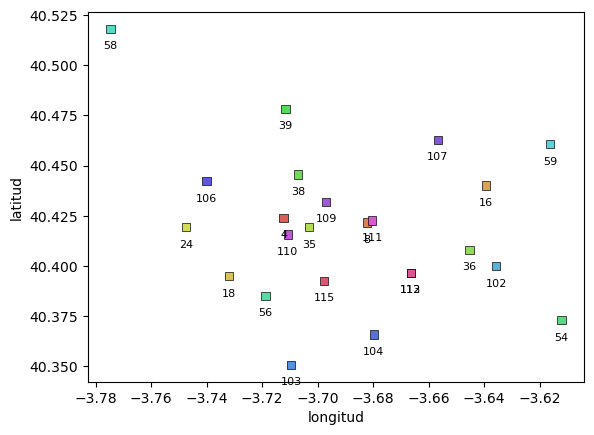

In [27]:
# palette creation with respect to the weather stations that are used for each magnitude
weather_station_codes = ws_df_filtered["codigo_corto"]
my_palette = sns.color_palette("hls", n_colors=len(list(weather_station_codes)))

# scatter plot of the weather stations
ax = sns.scatterplot(data=ws_df_filtered, x="longitud", y="latitud",hue = ws_df_filtered["codigo_corto"], palette=my_palette,
                marker="s", edgecolor="black", alpha=1, legend=None)

for i in range(ws_df_filtered.shape[0]):
        ax.text(ws_df_filtered.iloc[i]["longitud"], ws_df_filtered.iloc[i]["latitud"]-0.01, int(ws_df_filtered.iloc[i]["codigo_corto"]), ha="center", fontsize=8)

### Visualizing assignation of weather stations

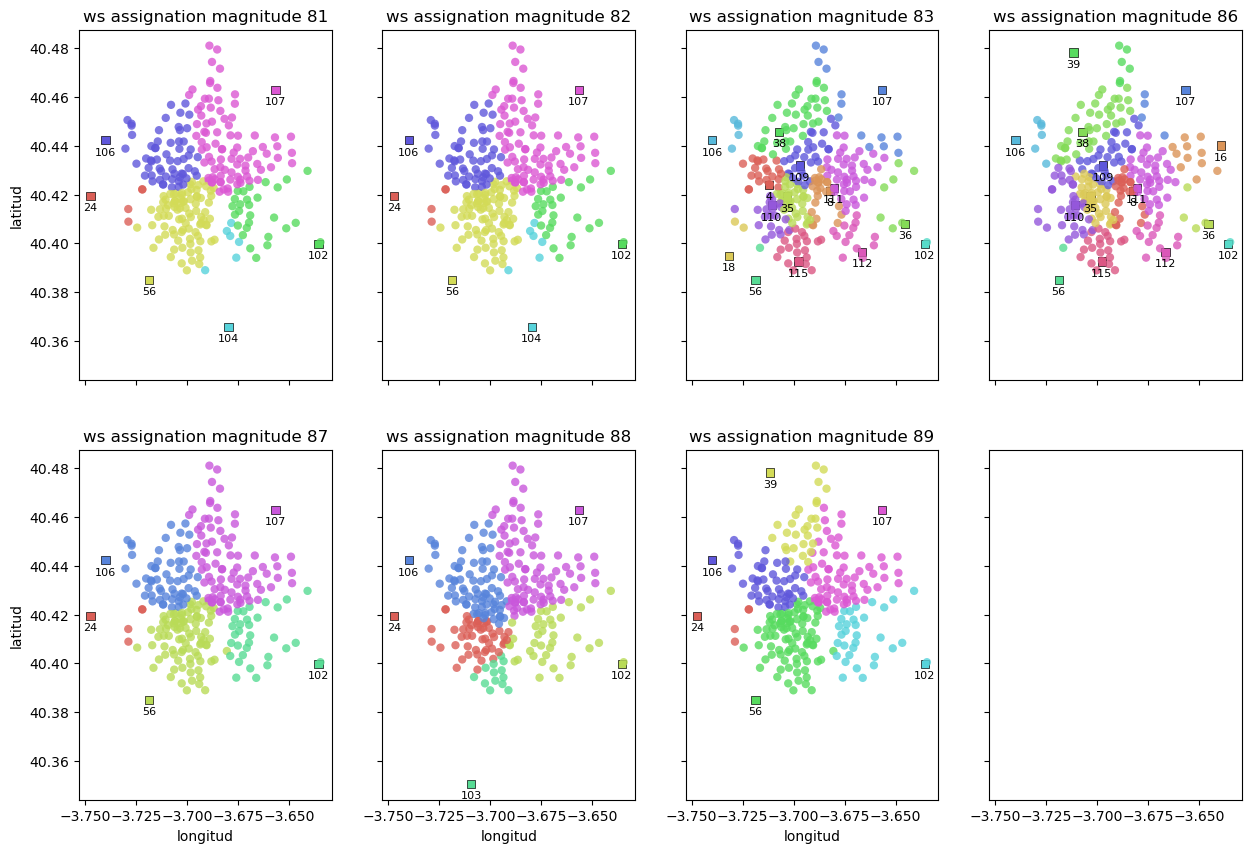

In [28]:
nrows = 2
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10),sharex=True, sharey=True)


for index, magnitude in enumerate(MAGNITUDES):
    # this is to build the rows and columns of the subplot
    if index < ncols:
        row = 0
        col = index
    else:
        row = 1
        col = index - ncols

    # palette creation with respect to the weather stations that are used for each magnitude
    weather_station_codes = bs_df["weather_station_" + str(magnitude)].unique()
    my_palette = sns.color_palette("hls", n_colors=len(list(weather_station_codes)))

    # subsample of the weather stations that register this specific magnitude
    ws_df_aux = ws_df_filtered.loc[ws_df_filtered["codigo_corto"].isin(bs_df["weather_station_" + str(magnitude)]),["longitud", "latitud", "codigo_corto"]]
    # scatter plot of the weather stations
    sns.scatterplot(data=ws_df_aux, x="longitud", y="latitud",hue = ws_df_aux["codigo_corto"], palette=my_palette,
                    marker="s", edgecolor="black", alpha=1, legend=None, ax=axes[row, col])
    
    # inserting labels to weather stations to know the code of each one
    for i in range(ws_df_aux.shape[0]):
        axes[row, col].text(ws_df_aux.iloc[i]["longitud"], ws_df_aux.iloc[i]["latitud"]-0.006, int(ws_df_aux.iloc[i]["codigo_corto"]), ha="center", fontsize=8)

    # subsample of the bike stations to get the weather station codes assigned for this magnitude
    bs_df_aux = bs_df[["longitud", "latitud", "weather_station_" + str(magnitude)]]
    # scatter plot of the bike stations
    sns.scatterplot(data=bs_df_aux, x="longitud", y="latitud",hue = bs_df_aux["weather_station_" + str(magnitude)],palette= my_palette,
                    marker="o", edgecolor="none", alpha=0.8, legend=None, ax=axes[row, col])
    
    # settint titles to the subplots
    axes[row,col].set(title="ws assignation magnitude " + str(magnitude))


This plot represents for each magnitude which is the weather station assigned to each bike station.

Weather stations are squares, bike stations circles, and all bike stations assigned to a weather station share color with the weather station.

# Processing weather data

In [29]:
weather_df_filtered.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2021,5,1,0.97,V,...,1.67,V,1.37,V,0.93,V,0.85,V,1.10,V
1,28,79,102,81,28079102_81_98,2021,5,2,2.23,V,...,1.38,V,1.93,V,2.12,V,1.70,V,2.57,V
2,28,79,102,81,28079102_81_98,2021,5,3,2.70,V,...,3.32,V,1.27,V,2.60,V,1.92,V,2.75,V
3,28,79,102,81,28079102_81_98,2021,5,4,2.25,V,...,1.78,V,1.57,V,1.67,V,0.75,V,0.38,V
4,28,79,102,81,28079102_81_98,2021,5,5,1.00,V,...,2.05,V,1.62,V,1.57,V,1.18,V,0.68,V


In [30]:
weather_df_filtered.groupby(["ESTACION", "MAGNITUD"]).count()["DIA"].unique()

array([31])

In [31]:
melted_df = pd.melt(weather_df_filtered, id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES', 'DIA'],
                        value_vars=['H{:02d}'.format(hour) for hour in range(1, 25)],
                        var_name='HORA', value_name='CANTIDAD')

melted_df

,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HORA,CANTIDAD
0,102,81,28079102_81_98,2021,5,1,H01,0.97
1,102,81,28079102_81_98,2021,5,2,H01,2.23
2,102,81,28079102_81_98,2021,5,3,H01,2.70
3,102,81,28079102_81_98,2021,5,4,H01,2.25
4,102,81,28079102_81_98,2021,5,5,H01,1.00
...,...,...,...,...,...,...,...,...
61747,59,89,28079059_89_98,2021,5,27,H24,0.00
61748,59,89,28079059_89_98,2021,5,28,H24,0.00
61749,59,89,28079059_89_98,2021,5,29,H24,0.00
61750,59,89,28079059_89_98,2021,5,30,H24,0.00


In [38]:
historical = melted_df.copy()
historical.insert(0, "numero", None)

for magnitude in MAGNITUDES:
    bs_df_column = "weather_station_" + str(magnitude)
    # we get the assigned weather stations for each magnitude (we don't need the rest)
    magnitude_stations = bs_df[bs_df_column].sort_values().unique()
    # we filter historical weather station data witht the assigned codes
    hist_weather_df = melted_df[melted_df["ESTACION"].isin(magnitude_stations)]
    # we filter historical weather data for only the magnitude
    hist_weather_df_magnitude = hist_weather_df[hist_weather_df["MAGNITUD"] == magnitude]
    # sub
    bs_df_magnitude = bs_df[["numero", bs_df_column]]
    
    aux = bs_df_magnitude.merge(hist_weather_df_magnitude, how = "left", right_on= ["ESTACION"], left_on=bs_df_column)
    aux = aux.drop(bs_df_column, axis = 1)
    historical[historical["MAGNITUD"] == magnitude] = aux
    
historical

,numero,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HORA,CANTIDAD
0,001 a,56,81,28079056_81_98,2021,5,1,H01,0.68
1,001 a,56,81,28079056_81_98,2021,5,2,H01,0.97
2,001 a,56,81,28079056_81_98,2021,5,3,H01,1.00
3,001 a,56,81,28079056_81_98,2021,5,4,H01,1.30
4,001 a,56,81,28079056_81_98,2021,5,5,H01,0.65
...,...,...,...,...,...,...,...,...,...
61747,82,102,89,28079102_89_98,2021,5,27,H24,0.00
61748,82,102,89,28079102_89_98,2021,5,28,H24,0.00
61749,82,102,89,28079102_89_98,2021,5,29,H24,0.00
61750,82,102,89,28079102_89_98,2021,5,30,H24,0.00


Next steps: 
- ensure we can merge by "numero", maybe we need some reformating. 
- Change the "HORA" column. 
- We should reformat the dataframe into a column per magnitude.

In [126]:
weather_df["V20"].unique()

array(['V', 'N'], dtype=object)

In [127]:
weather_df[weather_df["V01"] == "N"]

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
431,28,79,103,89,28079103_89_98,2021,5,29,0.0,N,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
820,28,79,107,86,28079107_86_98,2021,5,15,17.0,N,...,13.00,N,15.00,N,19.00,N,18.00,N,21.00,N
821,28,79,107,86,28079107_86_98,2021,5,16,24.0,N,...,16.00,N,21.00,N,27.00,N,31.00,N,33.00,N
822,28,79,107,86,28079107_86_98,2021,5,17,33.0,N,...,1.00,N,1.00,N,1.00,N,1.00,N,4.00,N
823,28,79,107,86,28079107_86_98,2021,5,18,10.0,N,...,4.00,N,6.00,N,10.00,N,12.00,N,15.00,N
824,28,79,107,86,28079107_86_98,2021,5,19,17.0,N,...,1.00,N,1.00,N,1.00,N,1.00,N,1.00,N
825,28,79,107,86,28079107_86_98,2021,5,20,3.0,N,...,1.00,N,1.00,N,1.00,N,5.00,N,6.00,N
826,28,79,107,86,28079107_86_98,2021,5,21,13.0,N,...,1.00,N,3.00,N,9.00,N,15.00,N,20.00,N
827,28,79,107,86,28079107_86_98,2021,5,22,25.0,N,...,1.00,N,3.00,N,4.00,N,5.00,N,4.00,N
828,28,79,107,86,28079107_86_98,2021,5,23,5.0,N,...,15.00,N,29.00,N,40.00,N,48.00,N,51.00,N


In [128]:
# station codes in the analyzed subsample
codes_in_subsample = weather_df["ESTACION"].unique()

In [129]:
# station codes in the stations list
all_codes = list(ws_df["codigo_corto"].astype(int))

In [130]:
# stations that are registering data but are not listed in the general list.
# if this list is not empty, it would be a problem
[code for code in codes_in_subsample if code not in all_codes]

[]

In [131]:
# stations that exist in the general list but are not registering data. Maybe they are old stations that
# have been removed for some reason.
[code for code in all_codes if code not in codes_in_subsample]

[114]

# Merging with merged trips and stations data